# 경기종합지수[Composite Economic Indexes]

## preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')
import seaborn as sns

In [2]:
df_cei = pd.read_csv('data/CEI_pre.csv') #data_load

In [3]:
df_cei

,지수별,1970. 01 목,1970. 02 일,1970. 03 일,1970. 04 수,1970. 05 금,1970. 06 월,1970. 07 수,1970. 08 토,1970. 09 화,...,2020. 06 월,2020. 07 수,2020. 08 토,2020. 09 화,2020. 10 목,2020. 11 일,2020. 12 화,2021. 01 금,2021. 02 월,2021. 03 월
0,선행종합지수(2015=100),4.4,4.4,4.4,4.5,4.5,4.5,4.6,4.6,4.6,...,118.3,119.0,120.0,120.9,121.6,122.6,123.4,124.1,124.8,125.3
1,선행종합지수 전월비(%),0.0,0.0,0.0,2.3,0.0,0.0,2.2,0.0,0.0,...,0.6,0.6,0.8,0.8,0.6,0.8,0.7,0.6,0.6,0.4
2,선행지수 순환변동치,101.1,101.0,100.8,100.7,100.5,100.3,100.2,100.0,99.8,...,99.7,100.0,100.6,101.0,101.4,102.0,102.4,102.7,102.9,103.1
3,〔순환변동치 전월차〕(p),0.0,-0.1,-0.2,-0.1,-0.2,-0.2,-0.1,-0.2,-0.2,...,0.4,0.3,0.6,0.4,0.4,0.6,0.4,0.3,0.2,0.2
4,선행지수 전년동월비(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.2,3.6,4.1,4.6,5.0,5.6,5.9,6.2,6.3,6.3
5,〔전년동월비 전월차〕(%p),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.3,0.4,0.5,0.5,0.4,0.6,0.3,0.3,0.1,0.0
6,동행종합지수(2015=100),4.0,4.1,4.2,4.3,4.3,4.4,4.4,4.4,4.5,...,110.7,111.0,111.8,112.3,113.0,113.8,114.0,113.9,114.3,115.1
7,동행종합지수 전월비(%),0.0,2.5,2.4,2.4,0.0,2.3,0.0,0.0,2.3,...,0.3,0.3,0.7,0.4,0.6,0.7,0.2,-0.1,0.4,0.7
8,동행지수 순환변동치,100.6,101.5,101.9,103.2,103.2,103.2,103.0,102.6,102.7,...,97.4,97.6,98.1,98.5,99.0,99.5,99.7,99.4,99.7,100.2
9,〔순환변동치 전월차〕(p),0.0,0.9,0.4,1.3,0.0,0.0,-0.2,-0.4,0.1,...,0.2,0.2,0.5,0.4,0.5,0.5,0.2,-0.3,0.3,0.5


In [4]:
df_cei_t = df_cei.T #transpose
df_cei_t

,0,1,2,3,4,5,6,7,8,9,10,11
지수별,선행종합지수(2015=100),선행종합지수 전월비(%),선행지수 순환변동치,〔순환변동치 전월차〕(p),선행지수 전년동월비(%),〔전년동월비 전월차〕(%p),동행종합지수(2015=100),동행종합지수 전월비(%),동행지수 순환변동치,〔순환변동치 전월차〕(p),후행종합지수(2015=100),후행종합지수 전월비(%)
1970. 01 목,4.4,0,101.1,0,0,0,4,0,100.6,0,4.1,0
1970. 02 일,4.4,0,101,-0.1,0,0,4.1,2.5,101.5,0.9,4.2,2.4
1970. 03 일,4.4,0,100.8,-0.2,0,0,4.2,2.4,101.9,0.4,4.3,2.4
1970. 04 수,4.5,2.3,100.7,-0.1,0,0,4.3,2.4,103.2,1.3,4.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020. 11 일,122.6,0.8,102,0.6,5.6,0.6,113.8,0.7,99.5,0.5,117.6,0.2
2020. 12 화,123.4,0.7,102.4,0.4,5.9,0.3,114,0.2,99.7,0.2,117.9,0.3
2021. 01 금,124.1,0.6,102.7,0.3,6.2,0.3,113.9,-0.1,99.4,-0.3,118.2,0.3
2021. 02 월,124.8,0.6,102.9,0.2,6.3,0.1,114.3,0.4,99.7,0.3,118.6,0.3


In [5]:
df_cei_t.columns = df_cei_t.iloc[0] #1행을 column으로 설정
df_cei_t.drop('지수별', inplace=True) #1행 삭제
df_cei_t

지수별,선행종합지수(2015=100),선행종합지수 전월비(%),선행지수 순환변동치,〔순환변동치 전월차〕(p),선행지수 전년동월비(%),〔전년동월비 전월차〕(%p),동행종합지수(2015=100),동행종합지수 전월비(%),동행지수 순환변동치,〔순환변동치 전월차〕(p),후행종합지수(2015=100),후행종합지수 전월비(%)
1970. 01 목,4.4,0,101.1,0,0,0,4,0,100.6,0,4.1,0
1970. 02 일,4.4,0,101,-0.1,0,0,4.1,2.5,101.5,0.9,4.2,2.4
1970. 03 일,4.4,0,100.8,-0.2,0,0,4.2,2.4,101.9,0.4,4.3,2.4
1970. 04 수,4.5,2.3,100.7,-0.1,0,0,4.3,2.4,103.2,1.3,4.3,0
1970. 05 금,4.5,0,100.5,-0.2,0,0,4.3,0,103.2,0,4.4,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2020. 11 일,122.6,0.8,102,0.6,5.6,0.6,113.8,0.7,99.5,0.5,117.6,0.2
2020. 12 화,123.4,0.7,102.4,0.4,5.9,0.3,114,0.2,99.7,0.2,117.9,0.3
2021. 01 금,124.1,0.6,102.7,0.3,6.2,0.3,113.9,-0.1,99.4,-0.3,118.2,0.3
2021. 02 월,124.8,0.6,102.9,0.2,6.3,0.1,114.3,0.4,99.7,0.3,118.6,0.3


### index로 날짜를 설정

In [6]:
cei_t_idx_date = [x[:8] for x in df_cei_t.index] #날짜의 앞부분 8개만
cei_t_idx_date[:10]

['1970. 01',
 '1970. 02',
 '1970. 03',
 '1970. 04',
 '1970. 05',
 '1970. 06',
 '1970. 07',
 '1970. 08',
 '1970. 09',
 '1970. 10']

In [7]:
df_cei_t['date'] = cei_t_idx_date
df_cei_t.head()

지수별,선행종합지수(2015=100),선행종합지수 전월비(%),선행지수 순환변동치,〔순환변동치 전월차〕(p),선행지수 전년동월비(%),〔전년동월비 전월차〕(%p),동행종합지수(2015=100),동행종합지수 전월비(%),동행지수 순환변동치,〔순환변동치 전월차〕(p),후행종합지수(2015=100),후행종합지수 전월비(%),date
1970. 01 목,4.4,0,101.1,0,0,0,4,0,100.6,0,4.1,0,1970. 01
1970. 02 일,4.4,0,101,-0.1,0,0,4.1,2.5,101.5,0.9,4.2,2.4,1970. 02
1970. 03 일,4.4,0,100.8,-0.2,0,0,4.2,2.4,101.9,0.4,4.3,2.4,1970. 03
1970. 04 수,4.5,2.3,100.7,-0.1,0,0,4.3,2.4,103.2,1.3,4.3,0,1970. 04
1970. 05 금,4.5,0,100.5,-0.2,0,0,4.3,0,103.2,0,4.4,2.3,1970. 05


In [8]:
df_cei_t.set_index('date', drop=True, inplace=True)
df_cei_t.head()

지수별,선행종합지수(2015=100),선행종합지수 전월비(%),선행지수 순환변동치,〔순환변동치 전월차〕(p),선행지수 전년동월비(%),〔전년동월비 전월차〕(%p),동행종합지수(2015=100),동행종합지수 전월비(%),동행지수 순환변동치,〔순환변동치 전월차〕(p),후행종합지수(2015=100),후행종합지수 전월비(%)
date,,,,,,,,,,,,
1970. 01,4.4,0,101.1,0,0,0,4,0,100.6,0,4.1,0
1970. 02,4.4,0,101,-0.1,0,0,4.1,2.5,101.5,0.9,4.2,2.4
1970. 03,4.4,0,100.8,-0.2,0,0,4.2,2.4,101.9,0.4,4.3,2.4
1970. 04,4.5,2.3,100.7,-0.1,0,0,4.3,2.4,103.2,1.3,4.3,0
1970. 05,4.5,0,100.5,-0.2,0,0,4.3,0,103.2,0,4.4,2.3


In [9]:
df_cei_t.index = pd.to_datetime(df_cei_t.index)
df_cei_t.head()

지수별,선행종합지수(2015=100),선행종합지수 전월비(%),선행지수 순환변동치,〔순환변동치 전월차〕(p),선행지수 전년동월비(%),〔전년동월비 전월차〕(%p),동행종합지수(2015=100),동행종합지수 전월비(%),동행지수 순환변동치,〔순환변동치 전월차〕(p),후행종합지수(2015=100),후행종합지수 전월비(%)
date,,,,,,,,,,,,
1970-01-01,4.4,0,101.1,0,0,0,4,0,100.6,0,4.1,0
1970-02-01,4.4,0,101,-0.1,0,0,4.1,2.5,101.5,0.9,4.2,2.4
1970-03-01,4.4,0,100.8,-0.2,0,0,4.2,2.4,101.9,0.4,4.3,2.4
1970-04-01,4.5,2.3,100.7,-0.1,0,0,4.3,2.4,103.2,1.3,4.3,0
1970-05-01,4.5,0,100.5,-0.2,0,0,4.3,0,103.2,0,4.4,2.3


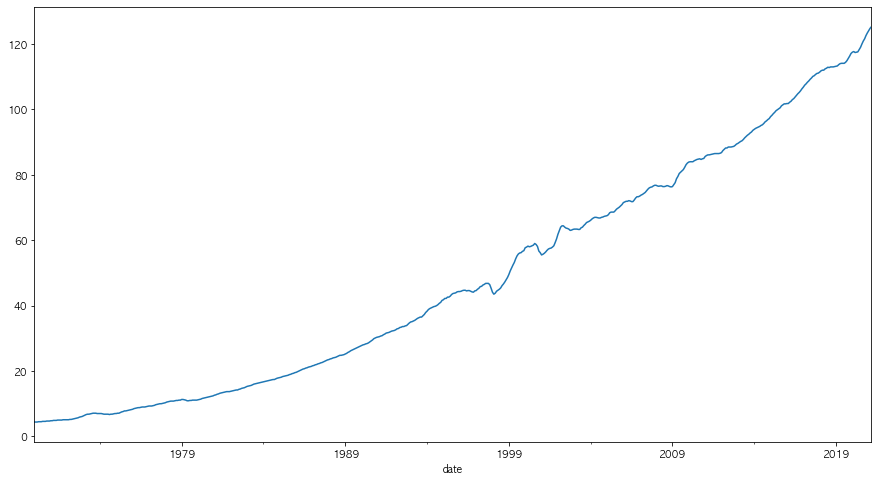

In [10]:
plt.figure(figsize=(15,8))
df_cei_t['선행종합지수(2015=100)'].plot()
plt.show()

In [11]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

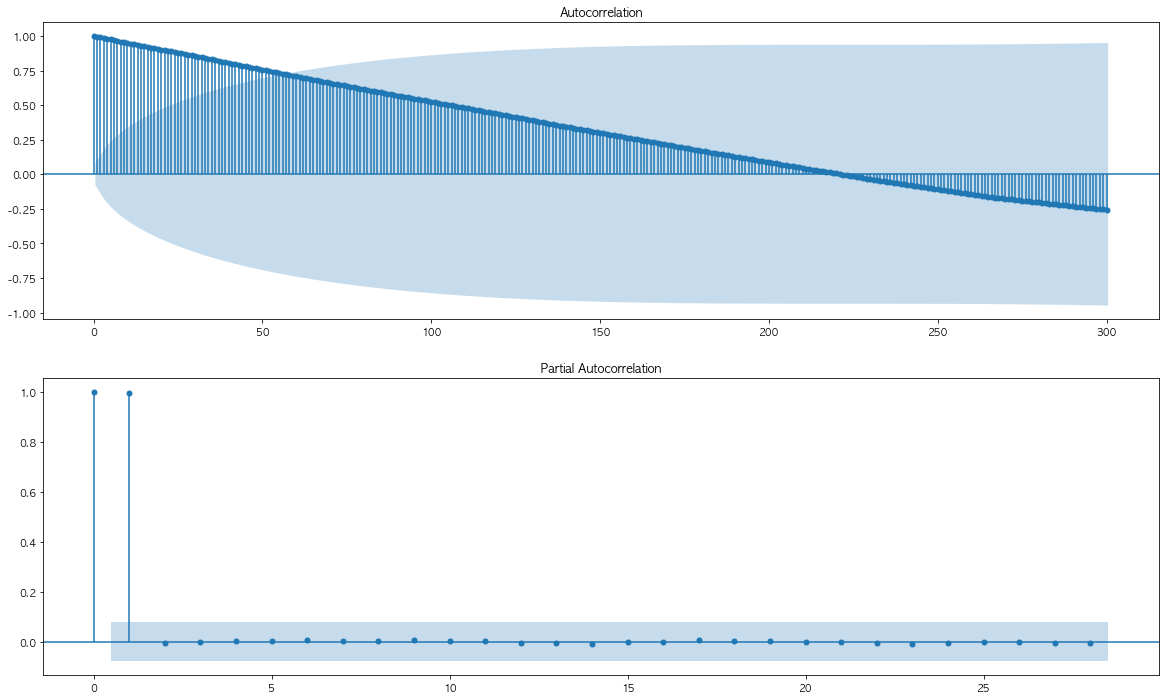

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(20,12))

plot_acf(df_cei_t['선행종합지수(2015=100)'], lags=300, ax=ax[0])
plot_pacf(df_cei_t['선행종합지수(2015=100)'], ax=ax[1])
plt.show()

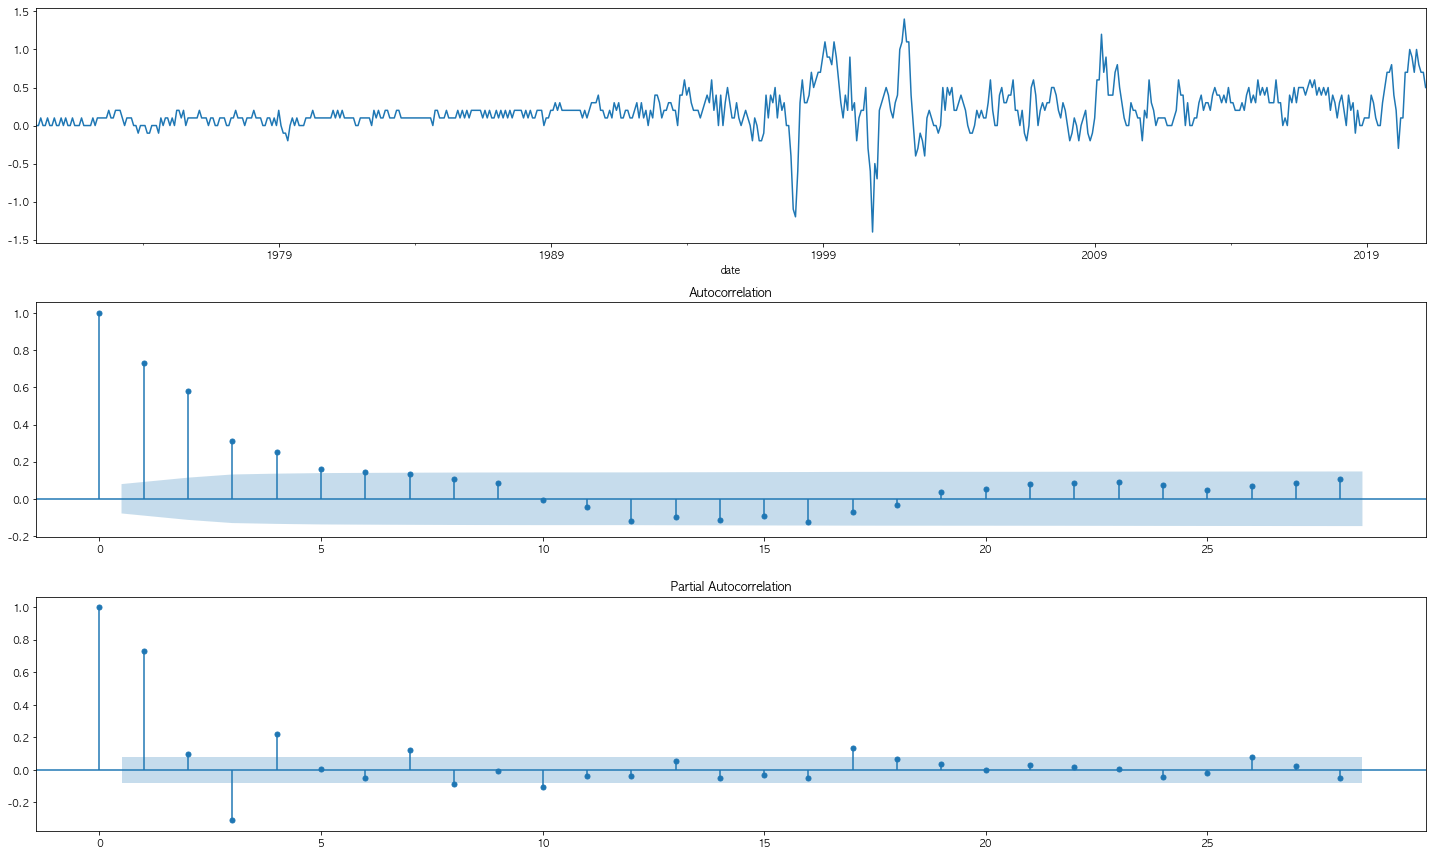

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(20,12))

diff_1=df_cei_t['선행종합지수(2015=100)'].diff(periods=1).iloc[1:]
diff_1.plot(ax=ax[0])
plot_acf(diff_1, ax=ax[1])
plot_pacf(diff_1, ax=ax[2])

plt.tight_layout()
plt.show()

In [14]:
df_train=df_cei_t.iloc[:-5]

In [15]:
# ARIMA 모델을 학습
model = ARIMA(df_train['선행종합지수(2015=100)'].values, order=(0,1,1))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  609
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  69.867
Method:                       css-mle   S.D. of innovations              0.216
Date:                Thu, 20 May 2021   AIC                           -133.734
Time:                        19:13:12   BIC                           -120.498
Sample:                             1   HQIC                          -128.585
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1926      0.013     15.080      0.000       0.168       0.218
ma.L1.D.y      0.4621      0.025     18.672      0.000       0.414       0.511
                                    Roots           

In [16]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_train['선행종합지수(2015=100)'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.45 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-262.784, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-290.385, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-284.236, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-308.217, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-389.015, Time=0.10 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=-393.184, Time=0.18 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=-392.072, Time=0.30 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=-445.911, Time=0.86 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-400.070, Time=0.36 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=-443.980, Time=1.02 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=-443.952, Time=0.63 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-438.152, Time=0.85 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=-455.404, Time=0.94 sec
 ARIMA(5,2,3)(0,0,0)[0]             : 

In [17]:
# ARIMA 모델을 학습
model = ARIMA(df_train['선행종합지수(2015=100)'].values, order=(5,2,3))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

/Users/johanjun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  608
Model:                 ARIMA(5, 2, 3)   Log Likelihood                 241.523
Method:                       css-mle   S.D. of innovations              0.162
Date:                Thu, 20 May 2021   AIC                           -463.045
Time:                        19:13:31   BIC                           -418.943
Sample:                             2   HQIC                          -445.887
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      4.126      0.000       0.000       0.001
ar.L1.D2.y    -0.4384      0.121     -3.624      0.000      -0.675      -0.201
ar.L2.D2.y     0.8142      0.065     12.574      0.0

In [18]:
# ARIMA 모델을 학습
model2 = ARIMA(df_train['선행종합지수(2015=100)'].values, order=(0,1,1))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit2 = model2.fit(trend='c', full_output=True, disp=True)
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  609
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  69.867
Method:                       css-mle   S.D. of innovations              0.216
Date:                Thu, 20 May 2021   AIC                           -133.734
Time:                        19:13:32   BIC                           -120.498
Sample:                             1   HQIC                          -128.585
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1926      0.013     15.080      0.000       0.168       0.218
ma.L1.D.y      0.4621      0.025     18.672      0.000       0.414       0.511
                                    Roots           

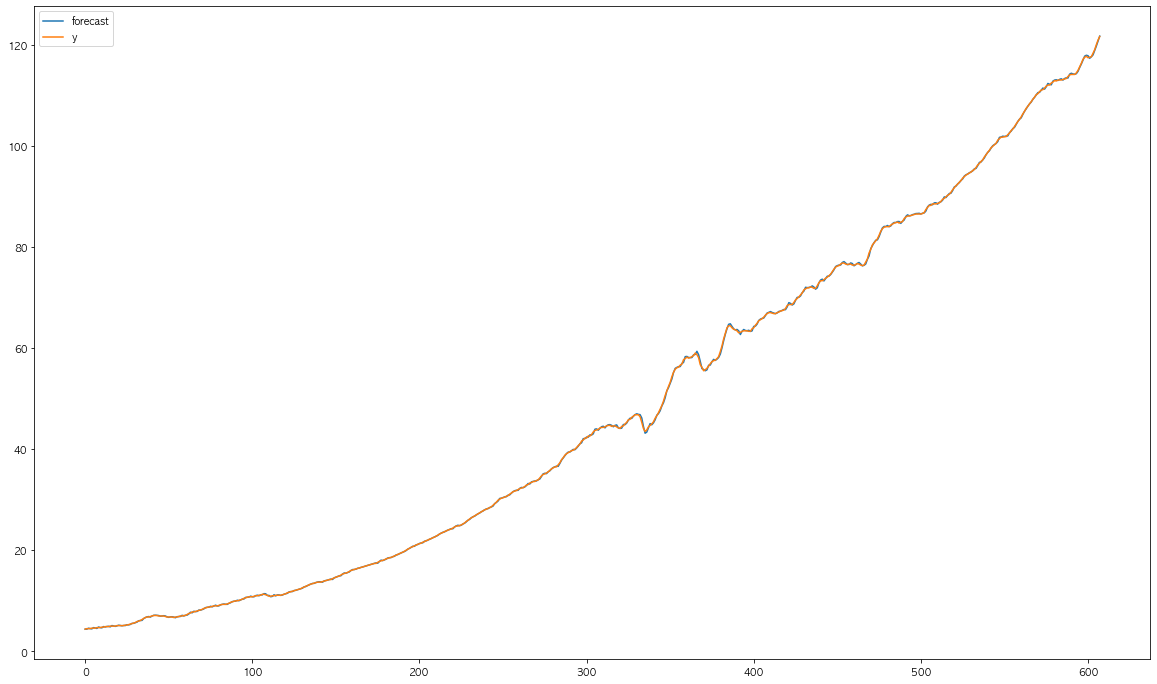

In [19]:
fig, ax = plt.subplots(figsize=(20, 12))
model_fit.plot_predict(ax=ax)

plt.show()

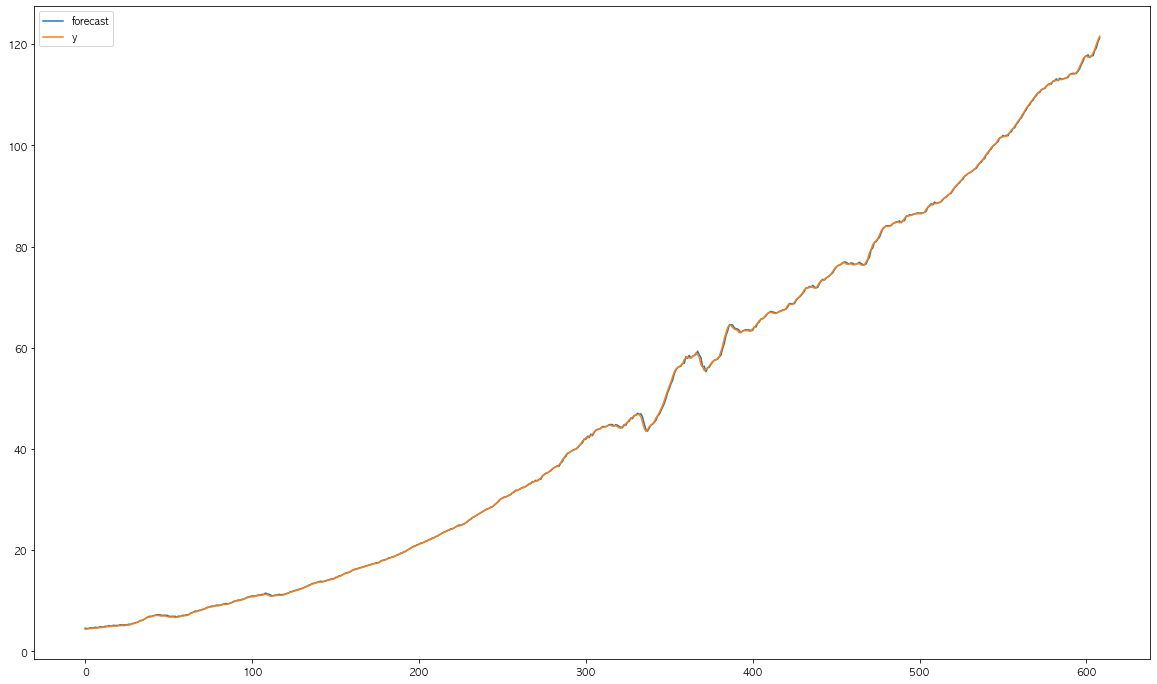

In [20]:
fig, ax = plt.subplots(figsize=(20, 12))
model_fit2.plot_predict(ax=ax)

plt.show()

In [21]:
fore = model_fit2.forecast(steps=5)
print(fore)

(array([121.94475995, 122.1373712 , 122.32998245, 122.5225937 ,
       122.71520495]), array([0.21570149, 0.38208324, 0.49542715, 0.58728914, 0.66661008]), array([[121.5219928 , 122.36752711],
       [121.38850182, 122.88624058],
       [121.35896307, 123.30100183],
       [121.37152814, 123.67365925],
       [121.4086732 , 124.02173669]]))


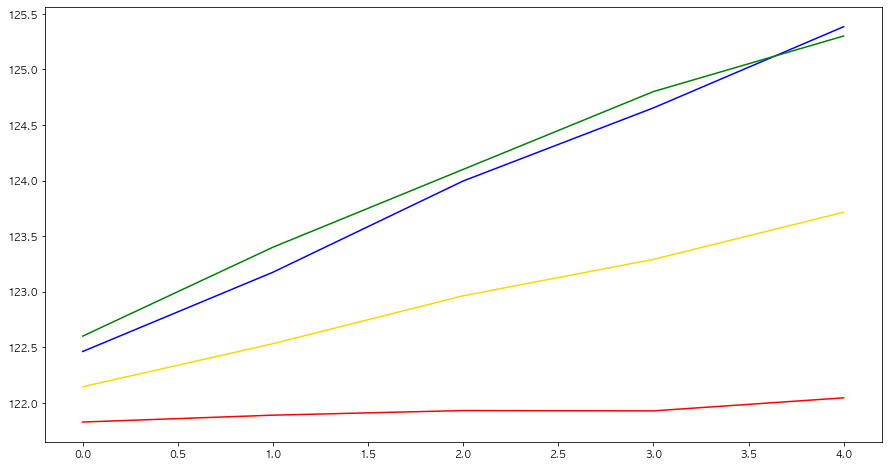

In [22]:
forecast_data = model_fit.forecast(steps=5) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.
df_test = df_cei_t.copy()

pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. 
test_y = df_test['선행종합지수(2015=100)'][-5:].values # 실제 5일 가격 데이터입니다. 
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

    
plt.figure(figsize=(15,8))
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

---

# 국내건설수주액

In [23]:
df_const_amt = pd.read_csv('data/국내건설수주액.csv')
df_const_amt.head()

,Unnamed: 0,총수주액[백만원],공공부문[백만원],중앙정부[백만원],지방자치단체[백만원],공기업[백만원],기타공공단체[백만원],민간부문[백만원],제조업[백만원],비제조업[백만원],...,도로 및 교량[백만원],항만 및 공항[백만원],철도 및 궤도[백만원],상하수도[백만원],발전 및 송전[백만원],토지조성[백만원],댐[백만원],기계설치[백만원],기타[백만원].1,조경공사[백만원]
0,1976-01-01,12592.0,9664.0,2037.0,3844.0,3243.0,540.0,2928.0,2434.0,494.0,...,5655.0,3122.0,0.0,35.0,953.0,97.0,0.0,239.0,34.0,NaN
1,1976-02-01,8230.0,4156.0,797.0,1954.0,1216.0,189.0,4074.0,1760.0,2314.0,...,419.0,700.0,0.0,38.0,23.0,1973.0,0.0,691.0,475.0,NaN
2,1976-03-01,22261.0,14173.0,1864.0,4764.0,7078.0,467.0,7419.0,4060.0,3359.0,...,3779.0,560.0,213.0,134.0,230.0,321.0,0.0,717.0,269.0,NaN
3,1976-04-01,45920.0,25729.0,11859.0,6088.0,6693.0,1089.0,20161.0,4498.0,15663.0,...,2887.0,3989.0,801.0,1584.0,340.0,1289.0,1.0,6694.0,1252.0,NaN
4,1976-05-01,48992.0,43014.0,23978.0,10847.0,6969.0,1220.0,5775.0,2578.0,3197.0,...,8691.0,9655.0,647.0,7414.0,485.0,875.0,168.0,598.0,1579.0,NaN


In [24]:
print(df_const_amt['Unnamed: 0'].dtype)

object


In [25]:
df_const_amt['Unnamed: 0'] = pd.to_datetime(df_const_amt['Unnamed: 0'])
print(df_const_amt['Unnamed: 0'].dtype)

df_const_amt.set_index('Unnamed: 0', drop=True, inplace=True)
df_const_amt.head(3)

datetime64[ns]


,총수주액[백만원],공공부문[백만원],중앙정부[백만원],지방자치단체[백만원],공기업[백만원],기타공공단체[백만원],민간부문[백만원],제조업[백만원],비제조업[백만원],국내외국기관[백만원],...,도로 및 교량[백만원],항만 및 공항[백만원],철도 및 궤도[백만원],상하수도[백만원],발전 및 송전[백만원],토지조성[백만원],댐[백만원],기계설치[백만원],기타[백만원].1,조경공사[백만원]
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1976-01-01,12592.0,9664.0,2037.0,3844.0,3243.0,540.0,2928.0,2434.0,494.0,NaN,...,5655.0,3122.0,0.0,35.0,953.0,97.0,0.0,239.0,34.0,NaN
1976-02-01,8230.0,4156.0,797.0,1954.0,1216.0,189.0,4074.0,1760.0,2314.0,NaN,...,419.0,700.0,0.0,38.0,23.0,1973.0,0.0,691.0,475.0,NaN
1976-03-01,22261.0,14173.0,1864.0,4764.0,7078.0,467.0,7419.0,4060.0,3359.0,669.0,...,3779.0,560.0,213.0,134.0,230.0,321.0,0.0,717.0,269.0,NaN


In [26]:
df_const_amt.index.name = 'date'
df_const_amt.head()

,총수주액[백만원],공공부문[백만원],중앙정부[백만원],지방자치단체[백만원],공기업[백만원],기타공공단체[백만원],민간부문[백만원],제조업[백만원],비제조업[백만원],국내외국기관[백만원],...,도로 및 교량[백만원],항만 및 공항[백만원],철도 및 궤도[백만원],상하수도[백만원],발전 및 송전[백만원],토지조성[백만원],댐[백만원],기계설치[백만원],기타[백만원].1,조경공사[백만원]
date,,,,,,,,,,,,,,,,,,,,,
1976-01-01,12592.0,9664.0,2037.0,3844.0,3243.0,540.0,2928.0,2434.0,494.0,NaN,...,5655.0,3122.0,0.0,35.0,953.0,97.0,0.0,239.0,34.0,NaN
1976-02-01,8230.0,4156.0,797.0,1954.0,1216.0,189.0,4074.0,1760.0,2314.0,NaN,...,419.0,700.0,0.0,38.0,23.0,1973.0,0.0,691.0,475.0,NaN
1976-03-01,22261.0,14173.0,1864.0,4764.0,7078.0,467.0,7419.0,4060.0,3359.0,669.0,...,3779.0,560.0,213.0,134.0,230.0,321.0,0.0,717.0,269.0,NaN
1976-04-01,45920.0,25729.0,11859.0,6088.0,6693.0,1089.0,20161.0,4498.0,15663.0,30.0,...,2887.0,3989.0,801.0,1584.0,340.0,1289.0,1.0,6694.0,1252.0,NaN
1976-05-01,48992.0,43014.0,23978.0,10847.0,6969.0,1220.0,5775.0,2578.0,3197.0,203.0,...,8691.0,9655.0,647.0,7414.0,485.0,875.0,168.0,598.0,1579.0,NaN


In [27]:
print(df_cei_t.index[0], df_cei_t.index[-1])
print(df_const_amt.index[0], df_const_amt.index[-1])

1970-01-01 00:00:00 2021-03-01 00:00:00
1976-01-01 00:00:00 2021-02-01 00:00:00


---

In [28]:
df_cei_t_series = pd.Series(df_cei_t.loc['1976-01-01' : '2021-02-01']['선행종합지수(2015=100)'])
df_cei_t_series

date
1976-01-01      8.3
1976-02-01      8.5
1976-03-01      8.6
1976-04-01      8.7
1976-05-01      8.8
              ...  
2020-10-01    121.6
2020-11-01    122.6
2020-12-01    123.4
2021-01-01    124.1
2021-02-01    124.8
Name: 선행종합지수(2015=100), Length: 542, dtype: object

In [29]:
df_const_amt_series = pd.Series(df_const_amt['총수주액[백만원]'])
df_const_amt_series

date
1976-01-01       12592.0
1976-02-01        8230.0
1976-03-01       22261.0
1976-04-01       45920.0
1976-05-01       48992.0
                 ...    
2020-10-01    13898995.0
2020-11-01    17702517.0
2020-12-01    29181854.0
2021-01-01    12817543.0
2021-02-01    10417025.0
Name: 총수주액[백만원], Length: 542, dtype: float64

In [30]:
df_corr = pd.DataFrame({
    "선행종합지수(2015=100)" : df_cei_t_series,
    "건설수주액(백만원)" : df_const_amt_series})

In [31]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 1976-01-01 to 2021-02-01
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   선행종합지수(2015=100)  542 non-null    object 
 1   건설수주액(백만원)        542 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.7+ KB


In [32]:
df_corr['선행종합지수(2015=100)'] = df_corr['선행종합지수(2015=100)'].apply(lambda x : int(x))
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 1976-01-01 to 2021-02-01
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   선행종합지수(2015=100)  542 non-null    int64  
 1   건설수주액(백만원)        542 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 12.7 KB


In [33]:
df_corr.corr()

,선행종합지수(2015=100),건설수주액(백만원)
선행종합지수(2015=100),1.000000,0.861383
건설수주액(백만원),0.861383,1.000000


In [34]:
df_const_amt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 1976-01-01 to 2021-02-01
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   총수주액[백만원]      542 non-null    float64
 1   공공부문[백만원]      542 non-null    float64
 2   중앙정부[백만원]      542 non-null    float64
 3   지방자치단체[백만원]    542 non-null    float64
 4   공기업[백만원]       542 non-null    float64
 5   기타공공단체[백만원]    542 non-null    float64
 6   민간부문[백만원]      542 non-null    float64
 7   제조업[백만원]       542 non-null    float64
 8   비제조업[백만원]      542 non-null    float64
 9   국내외국기관[백만원]    516 non-null    float64
 10  민자[백만원]        314 non-null    float64
 11  건축[백만원]        542 non-null    float64
 12  주택[백만원]        542 non-null    float64
 13  사무실 및 점포[백만원]  542 non-null    float64
 14  공장 및 창고[백만원]   542 non-null    float64
 15  관공서[백만원]       542 non-null    float64
 16  기타[백만원]        542 non-null    float64
 17  토목[백만원]        542 non-null    floa

In [35]:
df_const_amt['경기선행지수'] = df_cei_t['선행종합지수(2015=100)']
df_const_amt.head()

,총수주액[백만원],공공부문[백만원],중앙정부[백만원],지방자치단체[백만원],공기업[백만원],기타공공단체[백만원],민간부문[백만원],제조업[백만원],비제조업[백만원],국내외국기관[백만원],...,항만 및 공항[백만원],철도 및 궤도[백만원],상하수도[백만원],발전 및 송전[백만원],토지조성[백만원],댐[백만원],기계설치[백만원],기타[백만원].1,조경공사[백만원],경기선행지수
date,,,,,,,,,,,,,,,,,,,,,
1976-01-01,12592.0,9664.0,2037.0,3844.0,3243.0,540.0,2928.0,2434.0,494.0,NaN,...,3122.0,0.0,35.0,953.0,97.0,0.0,239.0,34.0,NaN,8.3
1976-02-01,8230.0,4156.0,797.0,1954.0,1216.0,189.0,4074.0,1760.0,2314.0,NaN,...,700.0,0.0,38.0,23.0,1973.0,0.0,691.0,475.0,NaN,8.5
1976-03-01,22261.0,14173.0,1864.0,4764.0,7078.0,467.0,7419.0,4060.0,3359.0,669.0,...,560.0,213.0,134.0,230.0,321.0,0.0,717.0,269.0,NaN,8.6
1976-04-01,45920.0,25729.0,11859.0,6088.0,6693.0,1089.0,20161.0,4498.0,15663.0,30.0,...,3989.0,801.0,1584.0,340.0,1289.0,1.0,6694.0,1252.0,NaN,8.7
1976-05-01,48992.0,43014.0,23978.0,10847.0,6969.0,1220.0,5775.0,2578.0,3197.0,203.0,...,9655.0,647.0,7414.0,485.0,875.0,168.0,598.0,1579.0,NaN,8.8


In [36]:
df_const_amt.corr()

,총수주액[백만원],공공부문[백만원],중앙정부[백만원],지방자치단체[백만원],공기업[백만원],기타공공단체[백만원],민간부문[백만원],제조업[백만원],비제조업[백만원],국내외국기관[백만원],...,도로 및 교량[백만원],항만 및 공항[백만원],철도 및 궤도[백만원],상하수도[백만원],발전 및 송전[백만원],토지조성[백만원],댐[백만원],기계설치[백만원],기타[백만원].1,조경공사[백만원]
총수주액[백만원],1.000000,0.835649,0.523341,0.703826,0.799547,0.621596,0.967470,0.811131,0.958672,0.168480,...,0.608362,0.521431,0.510165,0.628339,0.467003,0.753948,0.179677,0.726679,0.315125,0.439718
공공부문[백만원],0.835649,1.000000,0.710795,0.845229,0.928105,0.732381,0.680175,0.586743,0.670164,0.118400,...,0.808007,0.566308,0.580225,0.691764,0.360098,0.716211,0.263591,0.544532,0.393039,0.292377
중앙정부[백만원],0.523341,0.710795,1.000000,0.684052,0.467227,0.455045,0.390696,0.300632,0.393393,0.056074,...,0.684703,0.546016,0.491836,0.557710,0.181727,0.387657,0.152505,0.280929,0.254978,0.093685
지방자치단체[백만원],0.703826,0.845229,0.684052,1.000000,0.680454,0.523383,0.570576,0.425467,0.577667,0.103190,...,0.759799,0.559713,0.563757,0.695184,0.240962,0.601583,0.188763,0.394631,0.383020,0.260282
공기업[백만원],0.799547,0.928105,0.467227,0.680454,1.000000,0.588866,0.664650,0.606110,0.647264,0.113792,...,0.718676,0.466901,0.413282,0.589972,0.359645,0.719770,0.243791,0.554895,0.364804,0.313461
기타공공단체[백만원],0.621596,0.732381,0.455045,0.523383,0.588866,1.000000,0.506099,0.452189,0.495027,0.103123,...,0.475350,0.340525,0.638428,0.467470,0.341544,0.497693,0.273927,0.441230,0.258470,0.089525
민간부문[백만원],0.967470,0.680175,0.390696,0.570576,0.664650,0.506099,1.000000,0.834588,0.991792,0.167864,...,0.449102,0.439653,0.398804,0.534747,0.432225,0.687036,0.125610,0.734909,0.249341,0.418333
제조업[백만원],0.811131,0.586743,0.300632,0.425467,0.606110,0.452189,0.834588,1.000000,0.757300,0.152013,...,0.354583,0.332363,0.287265,0.449888,0.433254,0.600410,0.079450,0.866419,0.232064,0.223835
비제조업[백만원],0.958672,0.670164,0.393393,0.577667,0.647264,0.495027,0.991792,0.757300,1.000000,0.163573,...,0.450112,0.444067,0.406108,0.529524,0.411844,0.675126,0.130471,0.670135,0.241732,0.421890
국내외국기관[백만원],0.168480,0.118400,0.056074,0.103190,0.113792,0.103123,0.167864,0.152013,0.163573,1.000000,...,0.086657,0.059684,0.069231,0.143603,0.044353,0.198240,0.009465,0.108279,0.153168,-0.065484


In [37]:
df_const_amt['경기선행지수'] = df_const_amt['경기선행지수'].apply(lambda x : int(x))

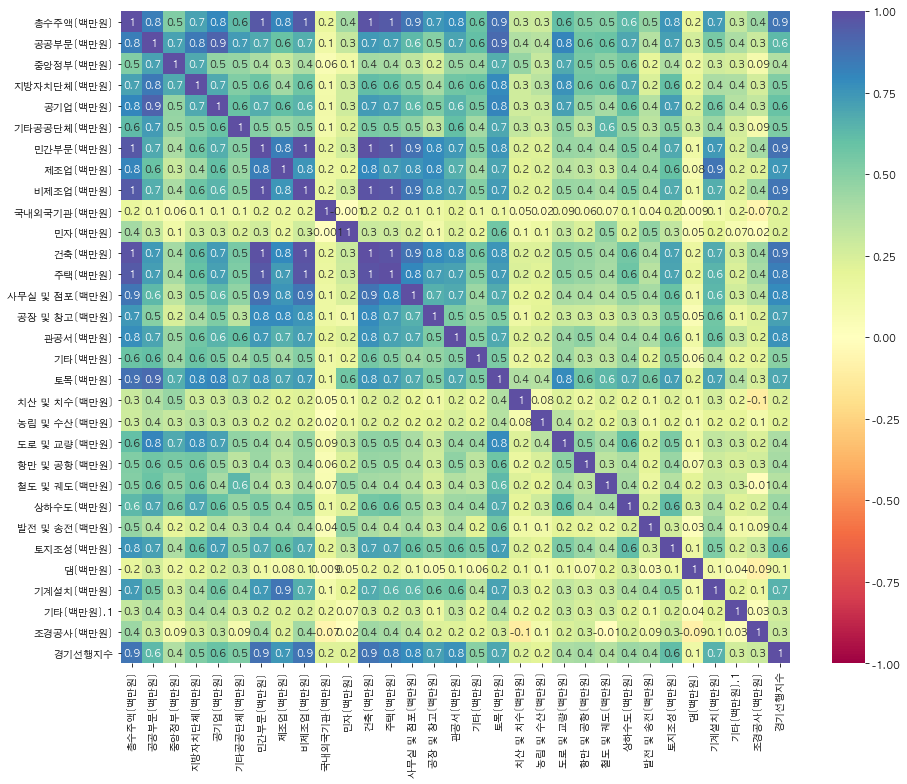

In [38]:
plt.figure(figsize=(15,12))
covMatrix = df_const_amt.corr()
sns.heatmap(covMatrix, cmap='Spectral', vmin=-1, vmax=1, annot=True, fmt='.1g',)
plt.show()

In [39]:
df_const_amt.isnull().sum()

총수주액[백만원]          0
공공부문[백만원]          0
중앙정부[백만원]          0
지방자치단체[백만원]        0
공기업[백만원]           0
기타공공단체[백만원]        0
민간부문[백만원]          0
제조업[백만원]           0
비제조업[백만원]          0
국내외국기관[백만원]       26
민자[백만원]          228
건축[백만원]            0
주택[백만원]            0
사무실 및 점포[백만원]      0
공장 및 창고[백만원]       0
관공서[백만원]           0
기타[백만원]            0
토목[백만원]            0
치산 및 치수[백만원]       0
농림 및 수산[백만원]       0
도로 및 교량[백만원]       0
항만 및 공항[백만원]       0
철도 및 궤도[백만원]       0
상하수도[백만원]          0
발전 및 송전[백만원]       0
토지조성[백만원]          0
댐[백만원]             0
기계설치[백만원]          0
기타[백만원].1          0
조경공사[백만원]        396
경기선행지수             0
dtype: int64

# merge

In [40]:
df_corr_merge = df_cei_t.iloc[:, [0]]
df_corr_merge['선행종합지수(2015=100)'] = df_corr_merge['선행종합지수(2015=100)'].apply(lambda x : float(x))
df_corr_merge

지수별,선행종합지수(2015=100)
date,
1970-01-01,4.4
1970-02-01,4.4
1970-03-01,4.4
1970-04-01,4.5
1970-05-01,4.5
...,...
2020-11-01,122.6
2020-12-01,123.4
2021-01-01,124.1


In [41]:
df_const_confirm = pd.read_csv('data/건축허가현황.csv')
df_const_confirm.name = 'df_const_confirm'

df_unsold = pd.read_csv('data/미분양주택현황.csv')
df_unsold.name = 'df_unsold'

df_apt_price = pd.read_csv('data/아파트 실거래가격지수.csv')
df_apt_price.name = 'df_apt_price'

df_month = pd.read_csv('data/유형별_주택월세통합가격지수.csv')
df_month.name = 'df_month'

df_house_comfirm = pd.read_csv('data/주택건설인허가실적.csv')
df_house_comfirm.name = 'df_house_comfirm'

df_house_selling = pd.read_csv('data/주택매매가격지수(KB).csv')
df_house_selling.name = 'df_house_selling'

df_house_deposit = pd.read_csv('data/주택전세가격지수(KB).csv')
df_house_deposit.name = 'df_house_deposit'

df_location = pd.read_csv('data/지역별_지가변동률.csv')
df_location.name = 'df_location'

In [42]:
li_df = [df_const_confirm, df_unsold, df_apt_price, df_month, df_house_comfirm, df_house_deposit, df_house_selling, df_location]
for l in li_df:
    print(l.name)

df_const_confirm
df_unsold
df_apt_price
df_month
df_house_comfirm
df_house_deposit
df_house_selling
df_location


In [43]:
for d in li_df:
    d['Unnamed: 0'] = pd.to_datetime(d['Unnamed: 0'])
    d.set_index('Unnamed: 0', drop=True, inplace=True)
    d.index.rename('date', inplace=True)
    print(d.name, d.iloc[:, [0]].head(1))

df_const_confirm             연면적-철근·철골조[㎡]
date                     
2000-08-01      3898712.0
df_unsold               전국[호]
date               
2007-01-01  75616.0
df_apt_price             도심권[2017.11=100]
date                        
2006-01-01              59.3
df_month             종합-전국[2017.11=100]
date                          
2015-06-01               100.2
df_house_comfirm               전국[호]
date               
2007-01-01  12038.0
df_house_deposit             총지수[2019.01=100]
date                        
1986-01-01            17.601
df_house_selling             총지수[2019.01=100]
date                        
1986-01-01            34.656
df_location             전국[%]
date             
2005-01-01  0.226


In [44]:
for d in li_df:
    df_corr_merge = pd.merge(df_corr_merge, d, left_index=True, right_index=True, how='left')

print(df_corr_merge.shape)

(615, 217)


In [45]:
col_sum = 0
for l in li_df:
    col_sum += l.shape[1]

print(col_sum)

216


In [46]:
df_corr_merge.corr()

,선행종합지수(2015=100),연면적-철근·철골조[㎡],연면적-조적조[㎡],연면적-목조[㎡],연면적-기타(자재별)[㎡],연면적-주거용[㎡],연면적-상업용[㎡],연면적-공업용[㎡],연면적-교육및사회용[㎡],연면적-기타(용도별)[㎡],...,세종[%],경기[%],강원[%],충북[%],충남[%],전북[%],전남[%],경북[%],경남[%],제주[%]
선행종합지수(2015=100),1.000000,0.520083,-0.740472,0.773218,-0.217393,0.323708,0.308804,0.266538,0.165700,0.828951,...,0.395684,0.064772,0.383297,0.081733,-0.147699,0.200889,0.505229,0.261900,-0.018978,0.103447
연면적-철근·철골조[㎡],0.520083,1.000000,-0.149554,0.667126,-0.205185,0.909092,0.844178,0.568400,0.361820,0.654549,...,0.064418,0.082501,0.410242,0.157504,0.020293,0.180796,0.377270,0.312562,0.151970,0.353693
연면적-조적조[㎡],-0.740472,-0.149554,1.000000,-0.388083,0.229731,-0.030350,0.036952,0.033493,-0.008931,-0.537095,...,-0.315278,-0.014559,-0.314382,-0.183919,-0.000703,-0.021513,-0.376799,-0.168109,0.065480,-0.000288
연면적-목조[㎡],0.773218,0.667126,-0.388083,1.000000,-0.257523,0.524299,0.446396,0.478417,0.346475,0.683479,...,-0.008102,-0.050323,0.280090,-0.080909,-0.242567,0.178194,0.281919,0.208592,0.071158,0.314404
연면적-기타(자재별)[㎡],-0.217393,-0.205185,0.229731,-0.257523,1.000000,-0.060015,-0.154333,-0.250915,-0.540456,-0.059271,...,-0.002567,0.099414,0.101128,0.064663,-0.024212,0.087971,0.220479,0.062083,-0.074373,-0.157095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
전북[%],0.200889,0.180796,-0.021513,0.178194,0.087971,0.130898,0.276461,0.196283,-0.362870,0.163581,...,0.268867,0.786013,0.736290,0.571170,0.572968,1.000000,0.747924,0.776609,0.752749,0.404834
전남[%],0.505229,0.377270,-0.376799,0.281919,0.220479,0.291399,0.451429,0.137365,-0.438602,0.447871,...,0.265986,0.794414,0.900759,0.750898,0.645114,0.747924,1.000000,0.865658,0.692939,0.410742
경북[%],0.261900,0.312562,-0.168109,0.208592,0.062083,0.312141,0.356990,0.144579,-0.416296,0.221505,...,0.084173,0.867433,0.902058,0.788528,0.758550,0.776609,0.865658,1.000000,0.845908,0.558753
경남[%],-0.018978,0.151970,0.065480,0.071158,-0.074373,0.207577,0.214919,0.092648,-0.398643,-0.025057,...,-0.044661,0.807592,0.815732,0.683104,0.709537,0.752749,0.692939,0.845908,1.000000,0.550341


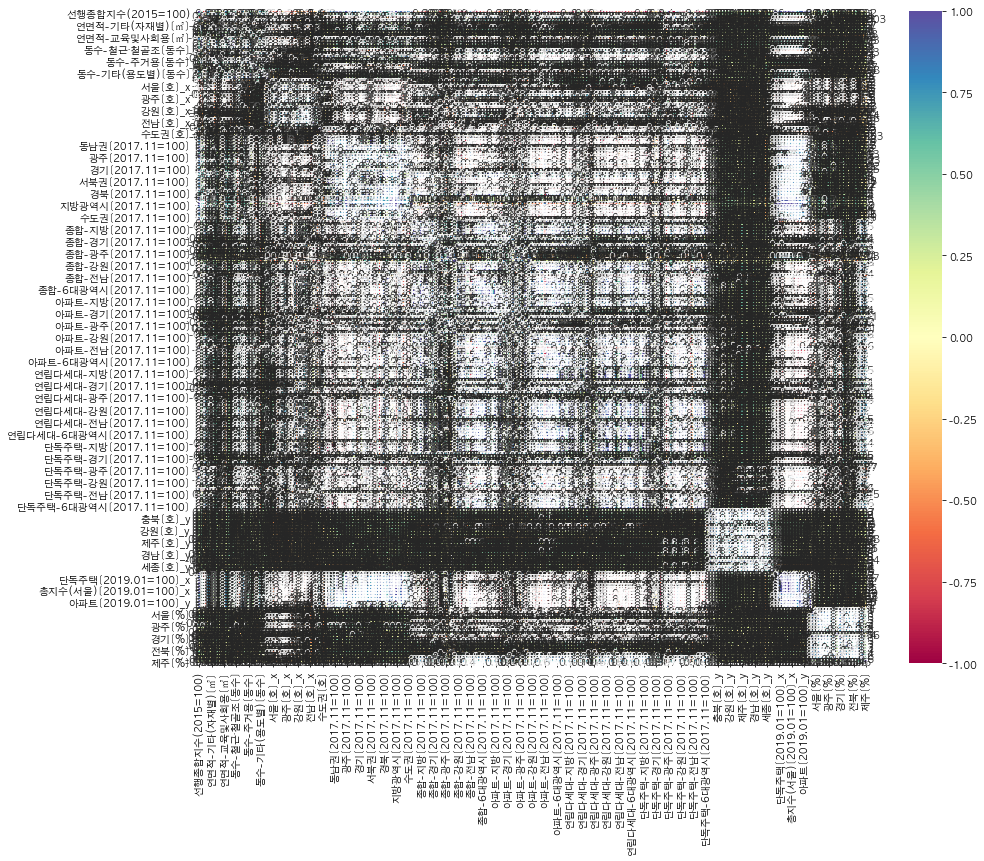

In [57]:
plt.figure(figsize=(15,12))
covMatrix = df_corr_merge.corr()
sns.heatmap(covMatrix, cmap='Spectral', vmin=-1, vmax=1, annot=True, fmt='.1g',)
plt.show()

In [48]:
df_corr_data = df_corr_merge.corr()

In [49]:
df_corr_data.head()

,선행종합지수(2015=100),연면적-철근·철골조[㎡],연면적-조적조[㎡],연면적-목조[㎡],연면적-기타(자재별)[㎡],연면적-주거용[㎡],연면적-상업용[㎡],연면적-공업용[㎡],연면적-교육및사회용[㎡],연면적-기타(용도별)[㎡],...,세종[%],경기[%],강원[%],충북[%],충남[%],전북[%],전남[%],경북[%],경남[%],제주[%]
선행종합지수(2015=100),1.000000,0.520083,-0.740472,0.773218,-0.217393,0.323708,0.308804,0.266538,0.165700,0.828951,...,0.395684,0.064772,0.383297,0.081733,-0.147699,0.200889,0.505229,0.261900,-0.018978,0.103447
연면적-철근·철골조[㎡],0.520083,1.000000,-0.149554,0.667126,-0.205185,0.909092,0.844178,0.568400,0.361820,0.654549,...,0.064418,0.082501,0.410242,0.157504,0.020293,0.180796,0.377270,0.312562,0.151970,0.353693
연면적-조적조[㎡],-0.740472,-0.149554,1.000000,-0.388083,0.229731,-0.030350,0.036952,0.033493,-0.008931,-0.537095,...,-0.315278,-0.014559,-0.314382,-0.183919,-0.000703,-0.021513,-0.376799,-0.168109,0.065480,-0.000288
연면적-목조[㎡],0.773218,0.667126,-0.388083,1.000000,-0.257523,0.524299,0.446396,0.478417,0.346475,0.683479,...,-0.008102,-0.050323,0.280090,-0.080909,-0.242567,0.178194,0.281919,0.208592,0.071158,0.314404
연면적-기타(자재별)[㎡],-0.217393,-0.205185,0.229731,-0.257523,1.000000,-0.060015,-0.154333,-0.250915,-0.540456,-0.059271,...,-0.002567,0.099414,0.101128,0.064663,-0.024212,0.087971,0.220479,0.062083,-0.074373,-0.157095


In [50]:
df_corr_data.iloc[0][2]

-0.7404724223644364

In [51]:
df_corr_data.columns

Index(['선행종합지수(2015=100)', '연면적-철근·철골조[㎡]', '연면적-조적조[㎡]', '연면적-목조[㎡]',
       '연면적-기타(자재별)[㎡]', '연면적-주거용[㎡]', '연면적-상업용[㎡]', '연면적-공업용[㎡]',
       '연면적-교육및사회용[㎡]', '연면적-기타(용도별)[㎡]',
       ...
       '세종[%]', '경기[%]', '강원[%]', '충북[%]', '충남[%]', '전북[%]', '전남[%]', '경북[%]',
       '경남[%]', '제주[%]'],
      dtype='object', length=217)

In [52]:
df_corr_data.iloc[0][2]

-0.7404724223644364

In [53]:
li_corr_data_positive = {'column' : [], 'corr' : []}

In [54]:
for i in range(len(df_corr_data.iloc[0])):
    if df_corr_data.iloc[0][i] >= 0.5:
        li_corr_data_positive['column'].append(df_corr_data.columns[i])
        li_corr_data_positive['corr'].append(df_corr_data.iloc[0][i])

In [55]:
df_corr_data_positive = pd.DataFrame(li_corr_data_positive)

In [56]:
df_corr_data_positive.sort_values(by='corr', ascending=False)[:10]

,column,corr
0,선행종합지수(2015=100),1.000000
49,아파트(서울)[2019.01=100]_x,0.986108
48,아파트[2019.01=100]_x,0.985935
45,총지수[2019.01=100]_x,0.984974
18,광주[2017.11=100],0.983433
47,연립주택[2019.01=100]_x,0.983402
50,총지수(서울)[2019.01=100]_x,0.982455
33,지방광역시[2017.11=100],0.976602
54,아파트[2019.01=100]_y,0.974359
35,전국[2017.11=100],0.969979


In [57]:
li_corr_data_negative = {'column' : [], 'corr' : []}

In [58]:
for i in range(len(df_corr_data.iloc[0])):
    if df_corr_data.iloc[0][i] < 0.5:
        li_corr_data_negative['column'].append(df_corr_data.columns[i])
        li_corr_data_negative['corr'].append(df_corr_data.iloc[0][i])

In [69]:
df_corr_data_negative = pd.DataFrame(li_corr_data_negative)
df_corr_data_negative.sort_values(by='corr', ascending=True)[:10]

,column,corr
101,단독주택-5대광역시[2017.11=100],-0.957372
109,단독주택-울산[2017.11=100],-0.957240
106,단독주택-부산[2017.11=100],-0.949555
117,단독주택-6대광역시[2017.11=100],-0.946296
87,연립다세대-세종[2017.11=100],-0.937554
89,연립다세대-충북[2017.11=100],-0.934157
100,단독주택-지방[2017.11=100],-0.930033
90,연립다세대-충남[2017.11=100],-0.929693
69,아파트-경북[2017.11=100],-0.926658
47,종합-경북[2017.11=100],-0.926158


In [60]:
# df_corr_merge.to_csv('merge_for_corr.csv')

In [61]:
# import pickle
# with open('df_corr_merge.pkl', 'wb') as f:
#     pickle.dump(df_corr_merge, f)

In [70]:
pos = df_corr_data_positive.sort_values(by='corr', ascending=False)[:10]
li_pos = pos['column'].values

neg = df_corr_data_negative.sort_values(by='corr', ascending=True)[:10]
li_neg = neg['column'].values

In [71]:
li_pos

array(['선행종합지수(2015=100)', '아파트(서울)[2019.01=100]_x', '아파트[2019.01=100]_x',
       '총지수[2019.01=100]_x', '광주[2017.11=100]', '연립주택[2019.01=100]_x',
       '총지수(서울)[2019.01=100]_x', '지방광역시[2017.11=100]',
       '아파트[2019.01=100]_y', '전국[2017.11=100]'], dtype=object)

In [72]:
li_neg

array(['단독주택-5대광역시[2017.11=100]', '단독주택-울산[2017.11=100]',
       '단독주택-부산[2017.11=100]', '단독주택-6대광역시[2017.11=100]',
       '연립다세대-세종[2017.11=100]', '연립다세대-충북[2017.11=100]',
       '단독주택-지방[2017.11=100]', '연립다세대-충남[2017.11=100]',
       '아파트-경북[2017.11=100]', '종합-경북[2017.11=100]'], dtype=object)

In [73]:
with open('li_pos.pkl', 'wb') as f:
    pickle.dump(li_pos, f)

In [74]:
with open('li_neg.pkl', 'wb') as f:
    pickle.dump(li_neg, f)